In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
# Defining the path for the dataframe
custom_df = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe
df = pd.read_pickle(custom_df)

In [3]:
# Function to automate splitting up the GOES flux 

def goes_flux(df, flux_column):
    a = df[ (flux_column < -7.0) ]  
    b = df[ (flux_column >= -7.0) & (flux_column < -6.0) ]  
    c = df[ (flux_column >= -6.0) & (flux_column < -5.0) ]  
    m = df[ (flux_column >= -5.0) & (flux_column < -4.0) ]  
    x = df[ (flux_column >= -4.0) ]
    
    return a, b, c, m, x

In [4]:
# CME speeds
dfsp = df[['cme_speed', 'smart_total_area', 'smart_r_value', 'smart_total_flux']]

# Removing the rows containing any NaN values
dfsp = dfsp.dropna(how='any')

# Reindexing
dfsp = dfsp.reset_index(drop=True)

# Converting from m.s.h to cm^2 (1 m.s.h = 3.0E16 cm^2)
#dfsp.smart_total_area = dfsp.smart_total_area.values*3.0E16

# Splitting up the CME speeds
s1 = dfsp[ (dfsp.cme_speed > 0) & (dfsp.cme_speed < 1000) ]  
s2 = dfsp[ (dfsp.cme_speed >= 1000) & (dfsp.cme_speed < 2000) ]  
s3 = dfsp[ (dfsp.cme_speed >= 2000) & (dfsp.cme_speed < 3000) ]  
s4 = dfsp[ (dfsp.cme_speed >= 3000) ]


#==== FLARES ======================================================================================================

# R-value histogram
dfq = df[['goes_flux', 'smart_r_value']]

# Removing the rows containing any NaN values
dfq = dfq.dropna(how='any')

# Reindexing
dfq = dfq.reset_index(drop=True)

# Splitting up the different GOES classes for this dataframe
dfq.goes_flux = np.log10(dfq.goes_flux)
aq, bq, cq, mq, xq = goes_flux(dfq, dfq.goes_flux)  

#==================================================================================================================

# Total flux histogram
df2 = df[['goes_flux', 'smart_total_flux']]
df2 = df2.dropna(how='any')
df2 = df2.reset_index(drop=True)

# Splitting up the different GOES classes for this dataframe
df2.goes_flux = np.log10(df2.goes_flux)
af, bf, cf, mf, xf = goes_flux(df2, df2.goes_flux)  

#==================================================================================================================

# WLSG histogram
dfw = df[['goes_flux', 'smart_wlsg']]
dfw = dfw.dropna(how='any')
dfw = dfw[(dfw[['smart_wlsg']] != 0).all(axis=1)]
dfw = dfw.reset_index(drop=True)

# Splitting up the different GOES classes for this dataframe
dfw.goes_flux = np.log10(dfw.goes_flux)
aw, bw, cw, mw, xw = goes_flux(dfw, dfw.goes_flux) 

#==================================================================================================================

# SRS area histogram
dfsm = df[['goes_flux', 'smart_total_area']]

# Removing the rows containing any NaN values
dfsm = dfsm.dropna(how='any')

# Reindexing
dfsm = dfsm.reset_index(drop=True)

# Splitting up the different GOES classes for this new dataframe
dfsm.goes_flux = np.log10(dfsm.goes_flux)
a2, b2, c2, m2, x2 = goes_flux(dfsm, dfsm.goes_flux)  

# Converting from m.s.h to cm^2 (1 m.s.h = 3.0E16 cm^2)
#a2cm = a2.smart_total_area.values*3.0E16
#b2cm = b2.smart_total_area.values*3.0E16
#c2cm = c2.smart_total_area.values*3.0E16
#m2cm = m2.smart_total_area.values*3.0E16
#x2cm = x2.smart_total_area.values*3.0E16

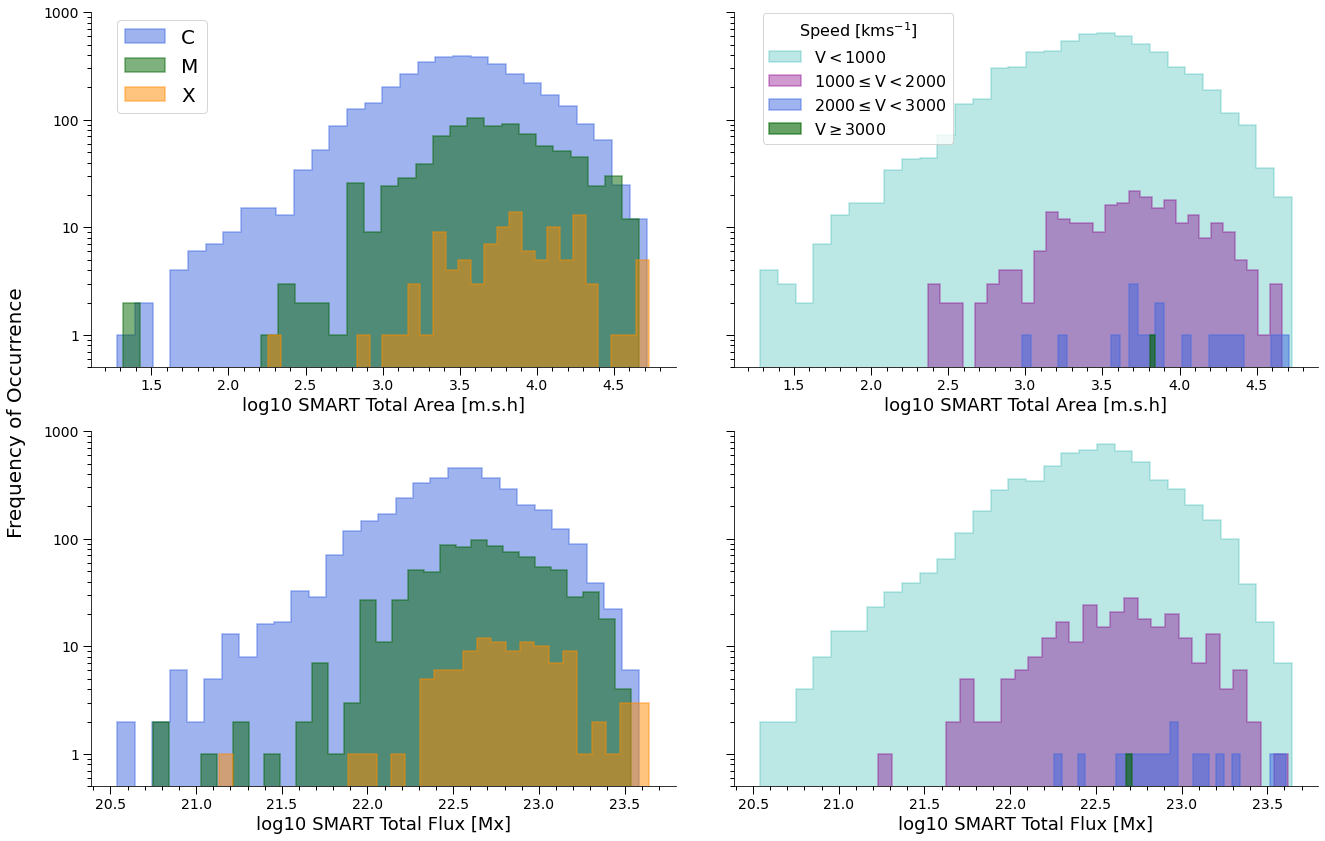

In [5]:
# Plotting flare step-hists
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12), sharey='row', facecolor='white')
#fig.subplots_adjust(wspace=0.15)

# Area
nc, bc, pc = ax1.hist(np.log10(c2.smart_total_area), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax1.hist(np.log10(m2.smart_total_area), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax1.hist(np.log10(x2.smart_total_area), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax1.set_yscale('log')
ax1.set_ylim([0.5,1000])
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_yticklabels(['1', '10', '100', '1000'])

ax1.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
ax1.legend(loc=[0.045,0.715], fontsize=20)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax1.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


#===============================================================================================================================

# Sunspot area with relation to CME speed 
na, ba, pa = ax2.hist(np.log10(s1.smart_total_area), 30, histtype='stepfilled',
                      ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3,
                      label=r'$\mathrm{V} < 1000$')

nb, bb, pb = ax2.hist(np.log10(s2.smart_total_area), 30, histtype='stepfilled',
                      ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4,
                      label=r'$1000 \leq \mathrm{V} < 2000$')

nc, bc, pc = ax2.hist(np.log10(s3.smart_total_area), 30, histtype='stepfilled',
                      ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5,
                      label=r'$2000 \leq \mathrm{V} < 3000$')

nm, bm, pm = ax2.hist(np.log10(s4.smart_total_area), 30, histtype='stepfilled',
                      ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6,
                      label=r'$\mathrm{V} \geq 3000$')

#\mathrm{V}_{\mathrm{CME}}

ax2.set_yscale('log')
ax2.set_ylim([0.5,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
leg = ax2.legend(loc=[0.05,0.63], fontsize=16, title='Speed [kms$^{-1}$]', title_fontsize=16)

plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax2.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)



#===============================================================================================================================


# Total flux
nc, bc, pc = ax3.hist(np.log10(cf.smart_total_flux), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax3.hist(np.log10(mf.smart_total_flux), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax3.hist(np.log10(xf.smart_total_flux), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax3.set_yscale('log')
ax3.set_ylim([0.5,1000])
ax3.set_yticks([1, 10, 100, 1000])
ax3.set_yticklabels(['1', '10', '100', '1000'])

ax3.set_xlabel('log10 SMART Total Flux [Mx]', fontsize=18)
#ax3.legend(loc=[0.045,0.75], fontsize=18)

ax3.yaxis.set_tick_params(labelleft=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)

ax3.xaxis.set_minor_locator(MultipleLocator(0.1))
ax3.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax3.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)


#===============================================================================================================================


# Flux with relation to CME speed
na, ba, pa = ax4.hist(np.log10(s1.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3)
nb, bb, pb = ax4.hist(np.log10(s2.smart_total_flux), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4)
nc, bc, pc = ax4.hist(np.log10(s3.smart_total_flux), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5)
nm, bm, pm = ax4.hist(np.log10(s4.smart_total_flux), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6)

ax4.set_yscale('log')
ax4.set_ylim([0.5,1000])
ax4.set_yticks([1, 10, 100, 1000])
ax4.set_yticklabels(['1', '10', '100', '1000'])

ax4.set_xlabel('log10 SMART Total Flux [Mx]', fontsize=18)
plt.setp(ax4.get_xticklabels(), fontsize=14)
plt.setp(ax4.get_yticklabels(), fontsize=14)

ax4.xaxis.set_minor_locator(MultipleLocator(0.1))
ax4.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax4.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

fig.text(-0.020, 0.5, 'Frequency of Occurrence', va='center', rotation='vertical', fontsize=20)

#plt.tight_layout()
plt.tight_layout(w_pad=5)
#plt.savefig('flux_step.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

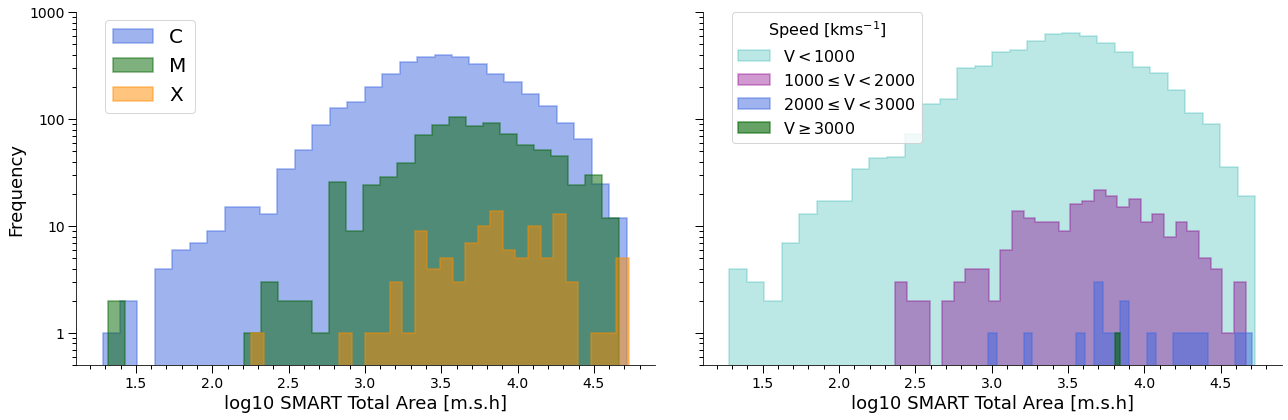

In [6]:
# Plotting flare step-hists
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey='row', facecolor='white')
#fig.subplots_adjust(wspace=0.15)

# Area
nc, bc, pc = ax1.hist(np.log10(c2.smart_total_area), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax1.hist(np.log10(m2.smart_total_area), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax1.hist(np.log10(x2.smart_total_area), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax1.set_yscale('log')
ax1.set_ylim([0.5,1000])
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_yticklabels(['1', '10', '100', '1000'])

ax1.set_ylabel('Frequency', fontsize=18)
ax1.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
ax1.legend(loc=[0.05,0.715], fontsize=20)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax1.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


#===============================================================================================================================

# Sunspot area with relation to CME speed 
na, ba, pa = ax2.hist(np.log10(s1.smart_total_area), 30, histtype='stepfilled',
                      ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3,
                      label=r'$\mathrm{V} < 1000$')

nb, bb, pb = ax2.hist(np.log10(s2.smart_total_area), 30, histtype='stepfilled',
                      ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4,
                      label=r'$1000 \leq \mathrm{V} < 2000$')

nc, bc, pc = ax2.hist(np.log10(s3.smart_total_area), 30, histtype='stepfilled',
                      ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5,
                      label=r'$2000 \leq \mathrm{V} < 3000$')

nm, bm, pm = ax2.hist(np.log10(s4.smart_total_area), 30, histtype='stepfilled',
                      ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6,
                      label=r'$\mathrm{V} \geq 3000$')

#\mathrm{V}_{\mathrm{CME}}

ax2.set_yscale('log')
ax2.set_ylim([0.5,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('log10 SMART Total Area [m.s.h]', fontsize=18)
leg = ax2.legend(loc=[0.05,0.63], fontsize=16, title='Speed [kms$^{-1}$]', title_fontsize=16)

plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

ax2.xaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax2.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

#===============================================================================================================================

#fig.text(-0.020, 0.5, 'Frequency of Occurrence', va='center', rotation='vertical', fontsize=20)

#plt.tight_layout()
plt.tight_layout(w_pad=4)
#plt.savefig('areas_only_v1.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

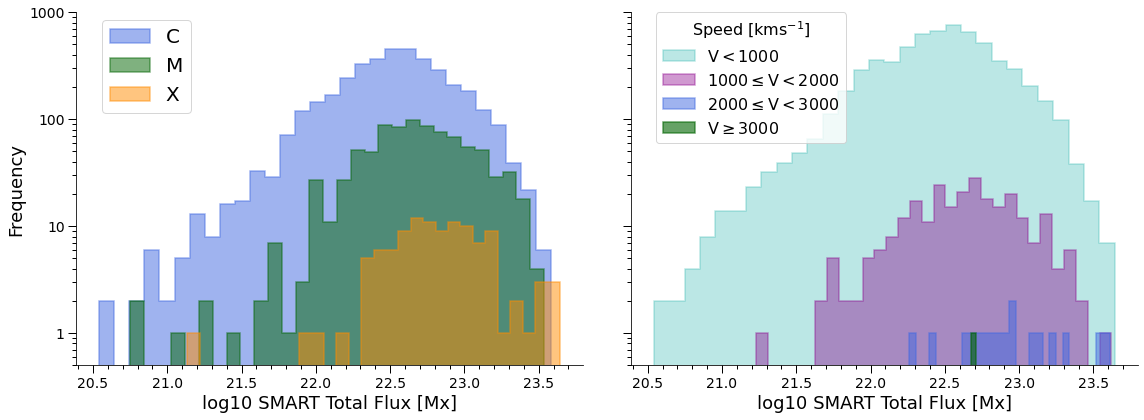

In [7]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 6), sharey='row', facecolor='white')

# Total flux
nc, bc, pc = ax3.hist(np.log10(cf.smart_total_flux), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax3.hist(np.log10(mf.smart_total_flux), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax3.hist(np.log10(xf.smart_total_flux), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax3.set_yscale('log')
ax3.set_ylim([0.5,1000])
ax3.set_yticks([1, 10, 100, 1000])
ax3.set_yticklabels(['1', '10', '100', '1000'])

ax3.set_ylabel('Frequency', fontsize=18)
ax3.set_xlabel('log10 SMART Total Flux [Mx]', fontsize=18)
ax3.legend(loc=[0.05,0.715], fontsize=20)

ax3.yaxis.set_tick_params(labelleft=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)

ax3.xaxis.set_minor_locator(MultipleLocator(0.1))
ax3.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax3.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)


#===============================================================================================================================


# Flux with relation to CME speed
na, ba, pa = ax4.hist(np.log10(s1.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label=r'$\mathrm{V} < 1000$')
nb, bb, pb = ax4.hist(np.log10(s2.smart_total_flux), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label=r'$1000 \leq \mathrm{V} < 2000$')
nc, bc, pc = ax4.hist(np.log10(s3.smart_total_flux), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label=r'$2000 \leq \mathrm{V} < 3000$')
nm, bm, pm = ax4.hist(np.log10(s4.smart_total_flux), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label=r'$\mathrm{V} \geq 3000$')

ax4.set_yscale('log')
ax4.set_ylim([0.5,1000])
ax4.set_yticks([1, 10, 100, 1000])
ax4.set_yticklabels(['1', '10', '100', '1000'])

ax4.set_xlabel('log10 SMART Total Flux [Mx]', fontsize=18)
leg = ax4.legend(loc=[0.05,0.63], fontsize=16, title='Speed [kms$^{-1}$]', title_fontsize=16)
plt.setp(ax4.get_xticklabels(), fontsize=14)
plt.setp(ax4.get_yticklabels(), fontsize=14)

ax4.xaxis.set_minor_locator(MultipleLocator(0.1))
ax4.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax4.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

#plt.tight_layout()
plt.tight_layout(w_pad=4)
#plt.savefig('poster_1.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

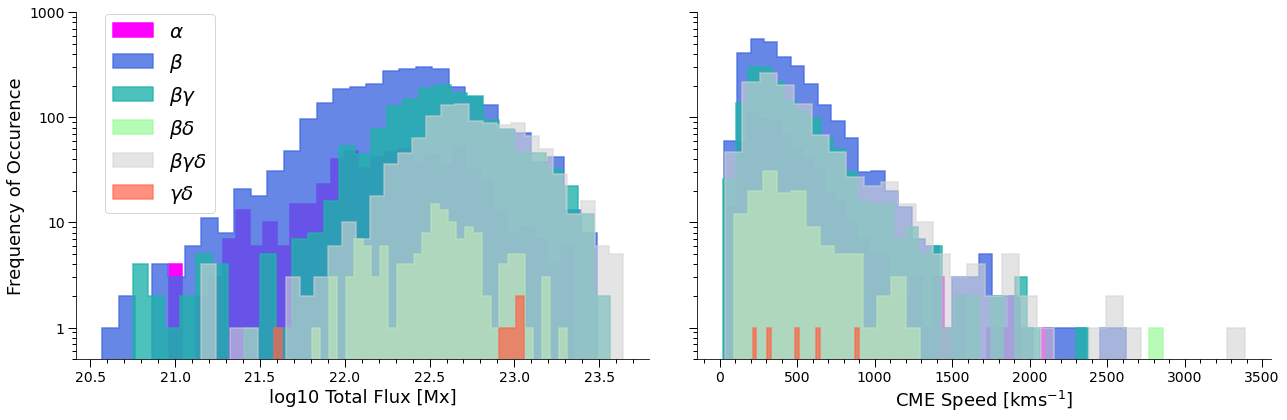

In [8]:
#=== Hale CLass 
dfs = df[['srs_hale', 'smart_total_area', 'cme_speed', 'smart_total_flux']]

# Removing the rows containing any NaN values
dfs = dfs.dropna(how='any')

# Reindexing
dfs = dfs.reset_index(drop=True)

# Separate each class 
a = dfs.loc[dfs['srs_hale'] == 1.0]     # alpha
b = dfs.loc[dfs['srs_hale'] == 2.0]     # beta
bg = dfs.loc[dfs['srs_hale'] == 3.0]    # beta-gamma
bd = dfs.loc[dfs['srs_hale'] == 4.0]    # beta-delta
bgd = dfs.loc[dfs['srs_hale'] == 5.0]   # beta-gamma-delta
gd = dfs.loc[dfs['srs_hale'] == 6.0]    # gamma-delta

# Splitting up the CME speeds
s1 = dfs[ (dfs.cme_speed > 0)    & (dfs.cme_speed <= 1000) ]  
s2 = dfs[ (dfs.cme_speed > 1000) & (dfs.cme_speed <= 2000) ]  
s3 = dfs[ (dfs.cme_speed > 2000) & (dfs.cme_speed <= 3000) ]  
s4 = dfs[ (dfs.cme_speed > 3000) ]


#===============================================================================================================================


fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey='row', facecolor='white')
#fig1.subplots_adjust(wspace=0.15)

# area 
n1, b1, p1 = ax1.hist(np.log10(a.smart_total_flux), 30, histtype='stepfilled',
                         ec='fuchsia', fc='fuchsia', lw=1.5, alpha=1, label=r'$\alpha$')
n2, b2, p2 = ax1.hist(np.log10(b.smart_total_flux), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.8, label=r'$\beta$')
n3, b3, p3 = ax1.hist(np.log10(bg.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.8, label=r'$\beta \gamma$')
n4, b4, p4 = ax1.hist(np.log10(bd.smart_total_flux), 30, histtype='stepfilled',
                         ec='palegreen', fc='palegreen', lw=1.5, alpha=0.7, label=r'$\beta \delta$')
n5, b5, p5 = ax1.hist(np.log10(bgd.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightgrey', fc='lightgrey', lw=1.5, alpha=0.6, label=r'$\beta \gamma \delta$')
n6, b6, p6 = ax1.hist(np.log10(gd.smart_total_flux), 30, histtype='stepfilled',
                         ec='tomato', fc='tomato', lw=1.5, alpha=0.7, label=r'$\gamma \delta$')

ax1.set_yscale('log')
ax1.set_ylim([0.5,1000])
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_yticklabels(['1', '10', '100', '1000'])

ax1.set_xlabel('log10 Total Flux [Mx]', fontsize=18)
ax1.set_ylabel('Frequency of Occurence', fontsize=18)
#ax1.legend(loc=[0.045,0.50], fontsize=16)
ax1.legend(loc=[0.05, 0.42], fontsize=20)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax1.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


# speed
n1, b1, p1 = ax2.hist(a.cme_speed, 30, histtype='stepfilled',
                         ec='fuchsia', fc='fuchsia', lw=1.5, alpha=1, label=r'$\alpha$')
n2, b2, p2 = ax2.hist(b.cme_speed, 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.8, label=r'$\beta$')
n3, b3, p3 = ax2.hist(bg.cme_speed, 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.8, label=r'$\beta \gamma$')
n4, b4, p4 = ax2.hist(bd.cme_speed, 30, histtype='stepfilled',
                         ec='palegreen', fc='palegreen', lw=1.5, alpha=0.7, label=r'$\beta \delta$')
n5, b5, p5 = ax2.hist(bgd.cme_speed, 30, histtype='stepfilled',
                         ec='lightgrey', fc='lightgrey', lw=1.5, alpha=0.6, label=r'$\beta \gamma \delta$')
n6, b6, p6 = ax2.hist(gd.cme_speed, 30, histtype='stepfilled',
                         ec='tomato', fc='tomato', lw=1.5, alpha=0.7, label=r'$\gamma \delta$')

ax2.set_yscale('log')
#ax2.set_xlim([2.5,6.25])
ax2.set_ylim([0.5,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('CME Speed [kms$^{-1}$]', fontsize=18)

#ax2.yaxis.set_tick_params(labelleft=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

ax2.xaxis.set_minor_locator(MultipleLocator(100))
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax2.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout(w_pad=4)
#plt.savefig('hale_step_flux.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

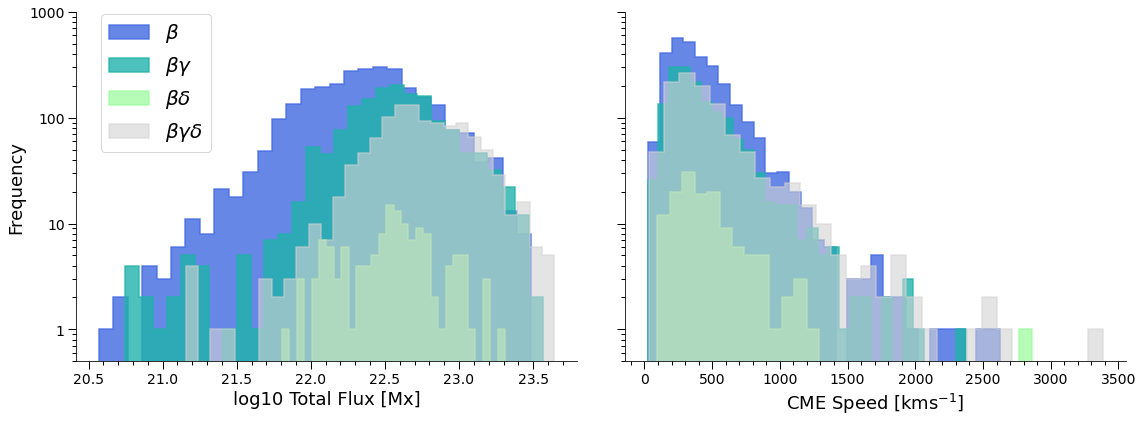

In [9]:
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey='row', facecolor='white')
#fig1.subplots_adjust(wspace=0.15)

# area 
#n1, b1, p1 = ax1.hist(np.log10(a.smart_total_flux), 30, histtype='stepfilled',
#                         ec='fuchsia', fc='fuchsia', lw=1.5, alpha=1, label=r'$\alpha$')
n2, b2, p2 = ax1.hist(np.log10(b.smart_total_flux), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.8, label=r'$\beta$')
n3, b3, p3 = ax1.hist(np.log10(bg.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.8, label=r'$\beta \gamma$')
n4, b4, p4 = ax1.hist(np.log10(bd.smart_total_flux), 30, histtype='stepfilled',
                         ec='palegreen', fc='palegreen', lw=1.5, alpha=0.7, label=r'$\beta \delta$')
n5, b5, p5 = ax1.hist(np.log10(bgd.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightgrey', fc='lightgrey', lw=1.5, alpha=0.6, label=r'$\beta \gamma \delta$')
#n6, b6, p6 = ax1.hist(np.log10(gd.smart_total_flux), 30, histtype='stepfilled',
#                         ec='tomato', fc='tomato', lw=1.5, alpha=0.7, label=r'$\gamma \delta$')

ax1.set_yscale('log')
ax1.set_ylim([0.5,1000])
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_yticklabels(['1', '10', '100', '1000'])

ax1.set_xlabel('log10 Total Flux [Mx]', fontsize=18)
ax1.set_ylabel('Frequency', fontsize=18)
#ax1.legend(loc=[0.045,0.50], fontsize=16)
ax1.legend(loc=[0.05, 0.6], fontsize=20)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax1.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


# speed
#n1, b1, p1 = ax2.hist(a.cme_speed, 30, histtype='stepfilled',
#                         ec='fuchsia', fc='fuchsia', lw=1.5, alpha=1, label=r'$\alpha$')
n2, b2, p2 = ax2.hist(b.cme_speed, 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.8, label=r'$\beta$')
n3, b3, p3 = ax2.hist(bg.cme_speed, 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.8, label=r'$\beta \gamma$')
n4, b4, p4 = ax2.hist(bd.cme_speed, 30, histtype='stepfilled',
                         ec='palegreen', fc='palegreen', lw=1.5, alpha=0.7, label=r'$\beta \delta$')
n5, b5, p5 = ax2.hist(bgd.cme_speed, 30, histtype='stepfilled',
                         ec='lightgrey', fc='lightgrey', lw=1.5, alpha=0.6, label=r'$\beta \gamma \delta$')
#n6, b6, p6 = ax2.hist(gd.cme_speed, 30, histtype='stepfilled',
#                         ec='tomato', fc='tomato', lw=1.5, alpha=0.7, label=r'$\gamma \delta$')

ax2.set_yscale('log')
#ax2.set_xlim([2.5,6.25])
ax2.set_ylim([0.5,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('CME Speed [kms$^{-1}$]', fontsize=18)

#ax2.yaxis.set_tick_params(labelleft=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

ax2.xaxis.set_minor_locator(MultipleLocator(100))
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax2.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout(w_pad=4)
#plt.savefig('poster_3.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

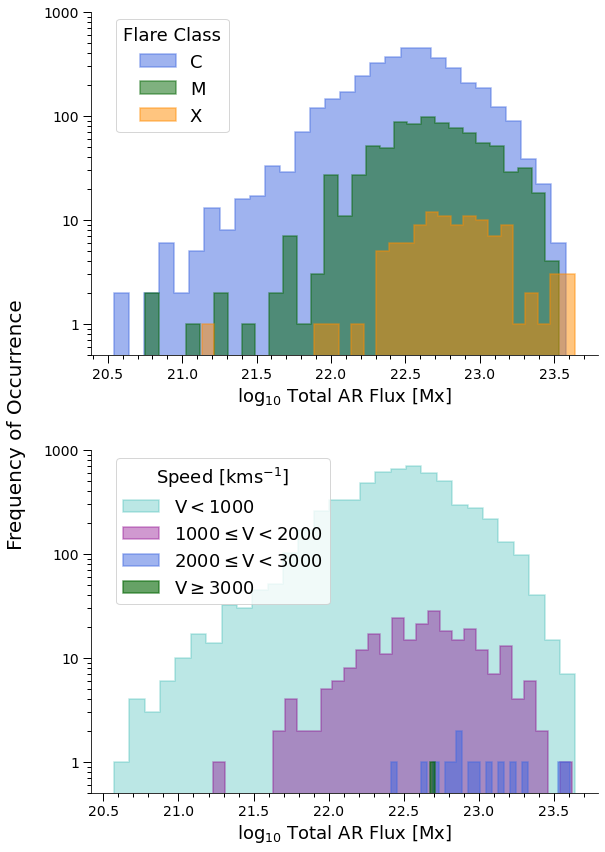

In [62]:
fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(8, 12), facecolor='white')

# Total flux
nc, bc, pc = ax3.hist(np.log10(cf.smart_total_flux), 30, ec='royalblue', fc='royalblue', lw=1.5, histtype='stepfilled',
                     label='C', alpha=0.5)
nm, bm, pm = ax3.hist(np.log10(mf.smart_total_flux), 30, ec='darkgreen', fc='darkgreen', lw=1.5, histtype='stepfilled',
                     label='M', alpha=0.5)
nx, bx, px = ax3.hist(np.log10(xf.smart_total_flux), 30, ec='darkorange', fc='darkorange', lw=1.5, histtype='stepfilled',
                     label='X', alpha=0.5)

pc[0].set_xy(pc[0].get_xy()[1:-1])
pm[0].set_xy(pm[0].get_xy()[1:-1])
px[0].set_xy(px[0].get_xy()[1:-1])

ax3.set_yscale('log')
ax3.set_ylim([0.5,1000])
ax3.set_yticks([1, 10, 100, 1000])
ax3.set_yticklabels(['1', '10', '100', '1000'])

ax3.set_xlabel('log$_{10}$ Total AR Flux [Mx]', fontsize=18)
ax3.legend(loc=[0.05,0.65], title='Flare Class', fontsize=18, title_fontsize=18)

ax3.yaxis.set_tick_params(labelleft=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)

ax3.xaxis.set_minor_locator(MultipleLocator(0.1))
ax3.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax3.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)


#===============================================================================================================================


# Flux with relation to CME speed
na, ba, pa = ax4.hist(np.log10(s1.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.3, label=r'$\mathrm{V} < 1000$')
nb, bb, pb = ax4.hist(np.log10(s2.smart_total_flux), 30, histtype='stepfilled',
                         ec='darkmagenta', fc='darkmagenta', lw=1.5, alpha=0.4, label=r'$1000 \leq \mathrm{V} < 2000$')
nc, bc, pc = ax4.hist(np.log10(s3.smart_total_flux), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.5, label=r'$2000 \leq \mathrm{V} < 3000$')
nm, bm, pm = ax4.hist(np.log10(s4.smart_total_flux), 30, histtype='stepfilled',
                         ec='darkgreen', fc='darkgreen', lw=1.5, alpha=0.6, label=r'$\mathrm{V} \geq 3000$')

ax4.set_yscale('log')
ax4.set_ylim([0.5,1000])
ax4.set_yticks([1, 10, 100, 1000])
ax4.set_yticklabels(['1', '10', '100', '1000'])

ax4.set_xlabel('log$_{10}$ Total AR Flux [Mx]', fontsize=18)
leg = ax4.legend(loc=[0.05,0.55], fontsize=18, title='Speed [kms$^{-1}$]', title_fontsize=18)
plt.setp(ax4.get_xticklabels(), fontsize=14)
plt.setp(ax4.get_yticklabels(), fontsize=14)

ax4.xaxis.set_minor_locator(MultipleLocator(0.1))
ax4.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax4.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

fig.text(-0.045, 0.5, 'Frequency of Occurrence', va='center', rotation='vertical', fontsize=20)

plt.tight_layout(h_pad=3)
#plt.savefig('pres1.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

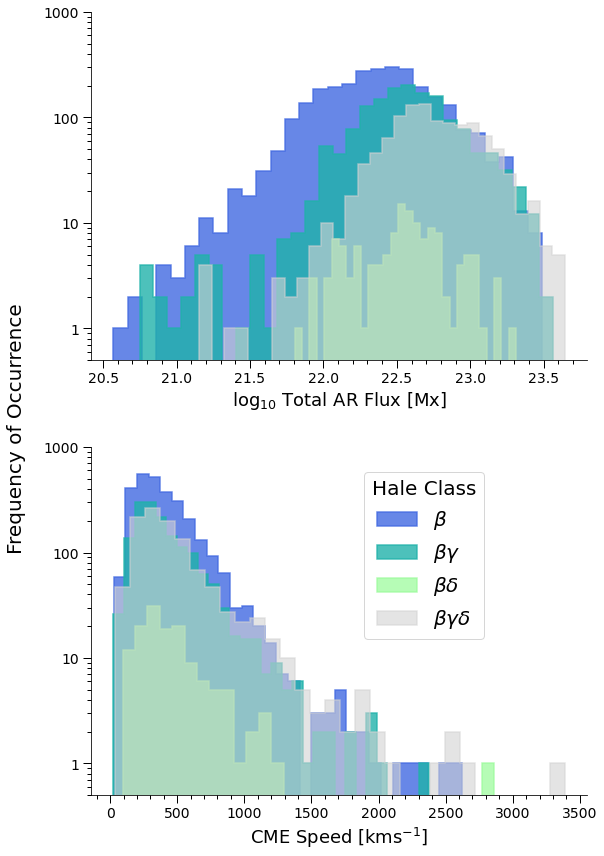

In [63]:
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12), facecolor='white')

n2, b2, p2 = ax1.hist(np.log10(b.smart_total_flux), 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.8, label=r'$\beta$')
n3, b3, p3 = ax1.hist(np.log10(bg.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.8, label=r'$\beta \gamma$')
n4, b4, p4 = ax1.hist(np.log10(bd.smart_total_flux), 30, histtype='stepfilled',
                         ec='palegreen', fc='palegreen', lw=1.5, alpha=0.7, label=r'$\beta \delta$')
n5, b5, p5 = ax1.hist(np.log10(bgd.smart_total_flux), 30, histtype='stepfilled',
                         ec='lightgrey', fc='lightgrey', lw=1.5, alpha=0.6, label=r'$\beta \gamma \delta$')

ax1.set_yscale('log')
ax1.set_ylim([0.5,1000])
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_yticklabels(['1', '10', '100', '1000'])

ax1.set_xlabel('log$_{10}$ Total AR Flux [Mx]', fontsize=18)
#ax1.legend(loc=[0.05, 0.5], fontsize=20, title='Hale Class', title_fontsize=20)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax1.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


# speed
n2, b2, p2 = ax2.hist(b.cme_speed, 30, histtype='stepfilled',
                         ec='royalblue', fc='royalblue', lw=1.5, alpha=0.8, label=r'$\beta$')
n3, b3, p3 = ax2.hist(bg.cme_speed, 30, histtype='stepfilled',
                         ec='lightseagreen', fc='lightseagreen', lw=1.5, alpha=0.8, label=r'$\beta \gamma$')
n4, b4, p4 = ax2.hist(bd.cme_speed, 30, histtype='stepfilled',
                         ec='palegreen', fc='palegreen', lw=1.5, alpha=0.7, label=r'$\beta \delta$')
n5, b5, p5 = ax2.hist(bgd.cme_speed, 30, histtype='stepfilled',
                         ec='lightgrey', fc='lightgrey', lw=1.5, alpha=0.6, label=r'$\beta \gamma \delta$')

ax2.set_yscale('log')
ax2.set_ylim([0.5,1000])
ax2.set_yticks([1, 10, 100, 1000])
ax2.set_yticklabels(['1', '10', '100', '1000'])

ax2.set_xlabel('CME Speed [kms$^{-1}$]', fontsize=18)
ax2.legend(loc=[0.55, 0.45], fontsize=20, title='Hale Class', title_fontsize=20)

plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

ax2.xaxis.set_minor_locator(MultipleLocator(100))
ax2.tick_params(axis='both', length=8, top=False, right=False, direction='out', width=1)
ax2.tick_params(axis='both', length=4, top=False, right=False, direction='out', which='minor', width=1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

fig1.text(-0.045, 0.5, 'Frequency of Occurrence', va='center', rotation='vertical', fontsize=20)

plt.tight_layout(h_pad=3)
#plt.savefig('pres2.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()